In [1]:
import numpy as np
import pandas as pd
from sklearn import svm
import matplotlib.pyplot as plt

In [2]:
path = "data_Smoker/"
data = "all" # options are "all", "2", "10" standing for the dim
samples = 25000 # max is len(dat_trn) but this is very slow

In [3]:
if data == "all":
    dat_trn = pd.read_csv(path+'trn_all.csv').values
    dat_tst = pd.read_csv(path+'tst_all.csv').values
elif data == "2":
    dat_trn = pd.read_csv(path+'trn_pca2.csv').values
    dat_tst = pd.read_csv(path+'tst_pca2.csv').values
elif data == "10":
    dat_trn = pd.read_csv(path+'trn_pca10.csv').values
    dat_tst = pd.read_csv(path+'tst_pca10.csv').values

y_tst = pd.read_csv(path+'tst_labs.csv').values[:,0]
y_trn = pd.read_csv(path+'trn_labs.csv').values[:,0]

# random indecies - all data is too slow for SVM
index = np.random.choice(len(dat_trn), samples, replace=False) # draws numbers without replacement (thats why i dont use randint)
dat_trn = dat_trn[index]
y_trn = y_trn[index]

In [5]:
# svm
clf = svm.SVC()
clf.fit(dat_trn.copy(), y_trn.copy())
pred_y_test = clf.predict(dat_tst.copy())

In [9]:
acc = np.count_nonzero(pred_y_test == y_tst)/len(y_tst)
acc_0 = int(len(pred_y_test[np.where(y_tst==0)])-np.sum(pred_y_test[np.where(y_tst==0)]))/len(np.where(y_tst==0)[0])
acc_1 = int(np.sum(pred_y_test[np.where(y_tst==1)]))/len(np.where(y_tst==1)[0])

if len(path) == 5:
    label = "diabetes"
else:
    label = path[5:-1]
print(f"Acc {label}:\n{int(np.sum(pred_y_test[np.where(y_tst==1)]))}/{len(np.where(y_tst==1)[0])} = {acc_1:.5f}")
print(f"Acc no {label}:\n{int(len(pred_y_test[np.where(y_tst==0)])-np.sum(pred_y_test[np.where(y_tst==0)]))}/{len(np.where(y_tst==0)[0])} = {acc_0:.5f}")
print(f"Acc overall:\n{np.count_nonzero(pred_y_test == y_tst)}/{len(y_tst)} = {acc:.5f}")

Acc Smoker:
4345/11227 = 0.38701
Acc no Smoker:
11295/14141 = 0.79874
Acc overall:
15640/25368 = 0.61652


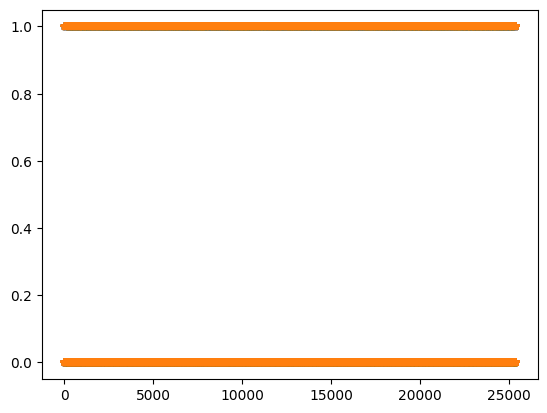

In [8]:
plt.plot(y_tst, '*')
plt.plot(pred_y_test, '*')